In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import pickle
import os

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='whitegrid', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [ ]:
dfs = []
for monkey in ['V', 'W']:
    for session in [0,1,2,3]:
        for bid in range(1, 25):
            for trial in range(1, 81):
                try:
                    file = f"monkey{monkey}_session{session}_block{bid}_trial{trial}"
                    sim = pd.read_pickle(f'data/nef_spikes/{file}_values.pkl')
                    emp = pd.read_pickle("data/empirical.pkl").query("monkey==@monkey & session==@session & block==@bid & trial==@trial")
                    sim['monkey_accuracy'] = emp['monkey_accuracy'].to_numpy()
                    dfs.append(sim)
                except:
                    pass
                    # print("missing", monkey, session, bid, trial)
acc = pd.concat(dfs, ignore_index=True)

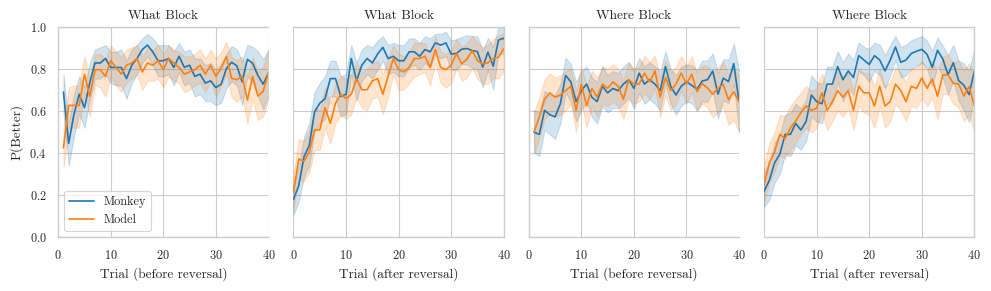

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(acc.query("block<13"), x='before', y='monkey_accuracy', color=palette[0], ax=axes[0], label='Monkey')
sns.lineplot(acc.query("block<13"), x='after', y='monkey_accuracy', color=palette[0], ax=axes[1])
sns.lineplot(acc.query("block>=13"), x='before', y='monkey_accuracy', color=palette[0], ax=axes[2])
sns.lineplot(acc.query("block>=13"), x='after', y='monkey_accuracy', color=palette[0], ax=axes[3])
sns.lineplot(acc.query("block<13"), x='before', y='acc', color=palette[1], ax=axes[0], label='Model')
sns.lineplot(acc.query("block<13"), x='after', y='acc', color=palette[1], ax=axes[1])
sns.lineplot(acc.query("block>=13"), x='before', y='acc', color=palette[1], ax=axes[2])
sns.lineplot(acc.query("block>=13"), x='after', y='acc', color=palette[1], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', xlim=(0, 40), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()
fig.savefig("plots/compare_accuracy_model1pt1.jpg", dpi=600)